# EFT work

In [2]:
import os
from LHEImport.LHEImport2 import read_lhe, tohdf5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector
# plt styles
plt.style.use(["science", "grid", "bright"])
plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[10,10]})

In [7]:
direc = 'event_files/lhe/eft/'
print(os.listdir('event_files/lhe/eft/'))

['run_01.lhe', 'run_02.lhe', 'run_03.lhe', 'run_04.lhe', 'run_05.lhe', 'run_06.lhe', 'run_07.lhe', 'run_08.lhe', 'run_09.lhe']


In [14]:
for file in os.listdir(direc):
    data_madspin = read_lhe(direc+file)
    tohdf5(data_madspin, 'event_files/hdf5/071221_eft', key=file.split('.')[0])

/home/craig/.local/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['event_info', 'particles', 'weights'], dtype='object')]

  pytables.to_hdf(


In [3]:
df_run_01 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_01')
df_run_02 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_02')
df_run_03 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_03')
df_run_04 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_04')
df_run_05 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_05')
df_run_06 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_06')
df_run_07 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_07')
df_run_08 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_08')
df_run_09 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_09')

In [4]:
def ptot2(particles):
    for p in particles: 
        if abs(p.pdgid) == 23:
            fourvec = p.fourvec
    return fourvec.pt

In [6]:
# df_run_01['ptz'] = df_run_01.apply(lambda r: ptot2(r['particles'], axis=1)

df_run_01['ptz'] = df_run_01.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_02['ptz'] = df_run_02.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_03['ptz'] = df_run_03.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_04['ptz'] = df_run_04.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_05['ptz'] = df_run_05.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_06['ptz'] = df_run_06.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_07['ptz'] = df_run_07.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_08['ptz'] = df_run_08.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_09['ptz'] = df_run_09.apply(lambda r: ptot2(r['particles']), axis=1)

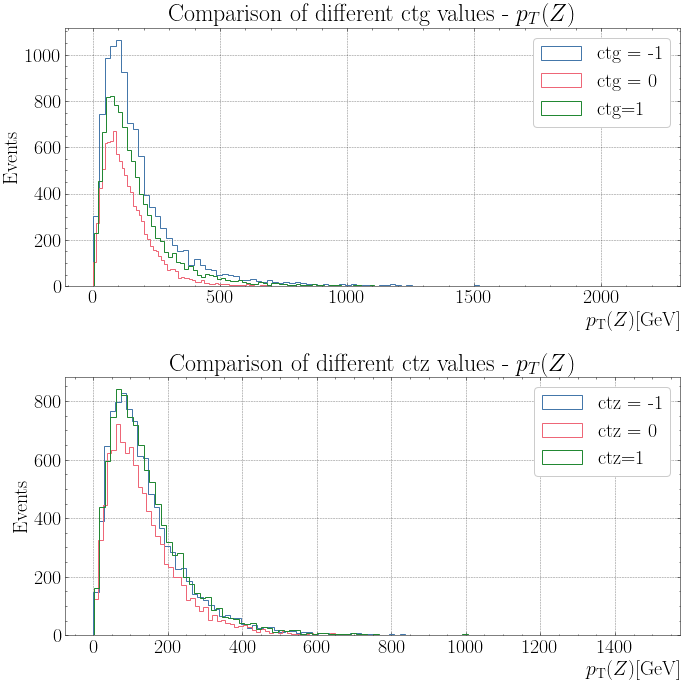

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df_run_01['ptz'],histtype='step', label='ctg = -1',bins=100)
ax[0].hist(df_run_02['ptz'], histtype='step', label='ctg = 0',bins=100)
ax[0].hist(df_run_03['ptz'], histtype='step', label='ctg=1',bins=100)
ax[0].set_title('Comparison of different ctg values - $p_T (Z)$')
ax[0].set_xlabel('$p_\mathrm{T}(Z)$[GeV]', loc='right')
ax[0].set_ylabel('Events')
ax[0].legend()
ax[1].hist(df_run_04['ptz'],histtype='step', label='ctz = -1',bins=100)
ax[1].hist(df_run_05['ptz'], histtype='step', label='ctz = 0',bins=100)
ax[1].hist(df_run_06['ptz'], histtype='step', label='ctz=1',bins=100)
ax[1].legend()
ax[1].set_xlabel('$p_\mathrm{T}(Z)$[GeV]', loc='right')
ax[1].set_title('Comparison of different ctz values - $p_T (Z)$')
ax[1].set_ylabel('Events')
plt.tight_layout()
plt.show()

In [16]:
for ind, row in df_run_09[:2].iterrows():
    print(row.weights)

{'rwgt_1': 0.017500501, 'ctG_1': 0.023219733, 'ctG_0': 0.017500501, 'ctG_-1': 0.012748192, 'ctZ_1': 0.020079851, 'ctZ_0': 0.017500501, 'ctZ_-1': 0.015249073}
{'rwgt_1': 0.017500501, 'ctG_1': 0.021467398, 'ctG_0': 0.017500501, 'ctG_-1': 0.013953562, 'ctZ_1': 0.016855477, 'ctZ_0': 0.017500501, 'ctZ_-1': 0.018614038}


In [25]:
# weight generation
# weights_ctg_1 = []
# for ind, row in df_run_09.iterrows():
#     weights_ctg_1.append(row.weights['ctG_1'])
# print(weights_ctg_1[2])
# df_run_09['weights']
def extract_weight(weights, weight_string):
    for key, value in weights.items():
        if key == weight_string:
            return value
            

for ind, row in df_run_09[:3].iterrows():
    print(extract_weight(row['weights'], 'ctG_1'))

0.023219733
0.021467398
0.028182432


In [33]:
df_run_09['ctg_1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctG_1'), axis=1)
df_run_09['ctg_-1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctG_-1'), axis=1)
df_run_09['ctg_0_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctG_0'), axis=1)
df_run_09['ctz_1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctZ_1'), axis=1)
df_run_09['ctz_0_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctZ_0'), axis=1)
df_run_09['ctz_-1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctZ_-1'), axis=1)

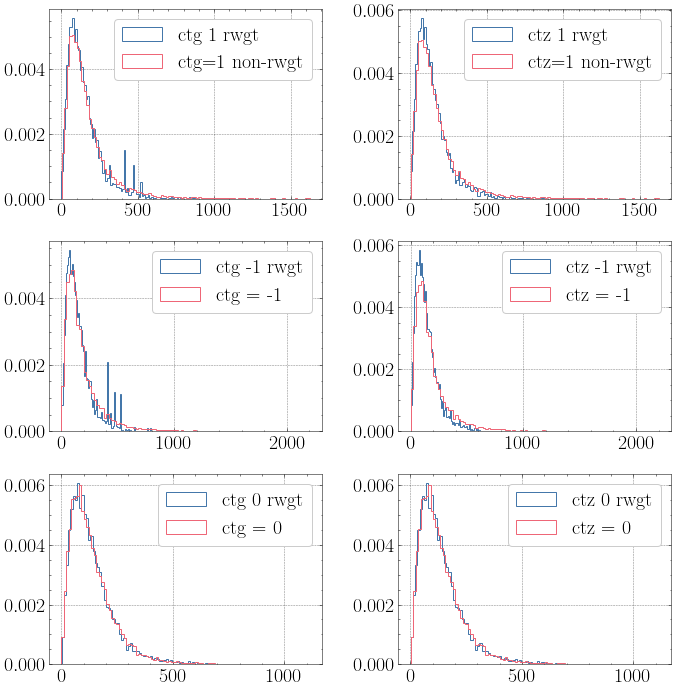

In [52]:
fig,ax = plt.subplots(3,2)
ax[0][0].hist(df_run_09['ptz'], weights=df_run_09['ctg_1_weight'],histtype='step', label='ctg 1 rwgt', bins=100, density=True)
ax[0][0].hist(df_run_03['ptz'], histtype='step', label='ctg=1 non-rwgt',bins=100, density =True)
ax[0][0].legend()
ax[1][0].hist(df_run_09['ptz'], weights=df_run_09['ctg_-1_weight'],histtype='step', label='ctg -1 rwgt', bins=100, density=True)
ax[1][0].hist(df_run_01['ptz'],histtype='step', label='ctg = -1',bins=100, density=True)
ax[1][0].legend()
ax[2][0].hist(df_run_09['ptz'], weights=df_run_09['ctg_0_weight'],histtype='step', label='ctg 0 rwgt', bins=100, density=True)
ax[2][0].hist(df_run_02['ptz'], histtype='step', label='ctg = 0',bins=100, density=True)
ax[2][0].legend()

ax[0][1].hist(df_run_09['ptz'], weights=df_run_09['ctz_1_weight'],histtype='step', label='ctz 1 rwgt', bins=100, density=True)
ax[0][1].hist(df_run_03['ptz'], histtype='step', label='ctz=1 non-rwgt',bins=100, density =True)
ax[0][1].legend()
ax[1][1].hist(df_run_09['ptz'], weights=df_run_09['ctz_-1_weight'],histtype='step', label='ctz -1 rwgt', bins=100, density=True)
ax[1][1].hist(df_run_01['ptz'],histtype='step', label='ctz = -1',bins=100, density=True)
ax[1][1].legend()
ax[2][1].hist(df_run_09['ptz'], weights=df_run_09['ctz_0_weight'],histtype='step', label='ctz 0 rwgt', bins=100, density=True)
ax[2][1].hist(df_run_02['ptz'], histtype='step', label='ctz = 0',bins=100, density=True)
ax[2][1].legend()
plt.tight_layout()
plt.show()